#Keras Version:

In [1]:
#Importing libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving final_data_17406.xlsx to final_data_17406.xlsx


In [3]:
import io
df = pd.read_excel(io.BytesIO(uploaded['final_data_17406.xlsx']))
df.head()

,authors,category,content,date,id,img_src,section,title,topics,url,startups,mobile,apps,social,gadgets,europe,enterprise
0,Lora Kolodny,Government,Investigative reporter and co-founder of Democ...,2016-10-15,1402133,https://tctechcrunch2011.files.wordpress.com/2...,enterprise/,Multi-media journalists face jail time after r...,edward-snowden,https://techcrunch.com/2016/10/15/multi-media-...,0,0,0,1,0,0,0
1,Keith Teare,Social,\n\nThe problems associated with the widesprea...,2016-10-07,1398512,https://tctechcrunch2011.files.wordpress.com/2...,social/,The case for Twitter’s independence (unless Go...,twitter,https://techcrunch.com/2016/10/07/you-cannot-t...,0,0,0,1,0,0,0
2,Frederic Lardinois,Cloud,"OpenStack, the massive open source project tha...",2016-10-06,1398065,https://tctechcrunch2011.files.wordpress.com/2...,enterprise/,OpenStack’s latest release focuses on scalabil...,NaN,https://techcrunch.com/2016/10/06/openstacks-l...,0,0,0,0,0,0,1
3,Haje Jan Kamps,Europe,It’s been just over a year since Adobe launche...,2016-10-05,1396326,https://tctechcrunch2011.files.wordpress.com/2...,europe/,Adobe teams up with EyeEm to expand its stock ...,NaN,https://techcrunch.com/2016/10/05/adobe-eyeem-...,1,1,0,0,0,1,0
4,Dr. Nancy Markley,Startups,\n\nMany startup companies begin with either a...,2016-10-04,1396165,https://tctechcrunch2011.files.wordpress.com/2...,startups/,Due diligence is a responsibility for investor...,NaN,https://techcrunch.com/2016/10/04/due-diligenc...,1,0,0,0,0,0,0


In [4]:
#df.drop(['id','date','img_src','section','topics','url'],axis=1,inplace=True)
df_main = df[['content','title','startups','mobile','apps','social','gadgets','europe','enterprise']]
df_main.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
df_main['content'] = df_main['content'].str.lstrip()
df_main['title'] = df_main['title'].str.lstrip()
#df_main['tags'] = df_main['tags'].str.lstrip()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
def checking_Data(index):
    row = df_main[df_main.index == index][['title', 'content']].values[0]
    if len(row) > 0:
        print('Title:',row[0])
        print('Content:',row[1])        
checking_Data(0)

Title: Multi-media journalists face jail time after reporting on North Dakota pipeline protest
Content: Investigative reporter and co-founder of Democracy Now!, Amy Goodman, is now facing riot charges in the state of North Dakota after her report on a Native American-led pipeline protest there went viral on Facebook.
Democracy Now! issued a statement about the new charges against Goodman late Saturday.
The news organization, which spun out of WBAI-FM, creates programming which is syndicated via radio, podcasts, cable television, public access television, live streams and Web downloads.
Goodman’s story, posted to Facebook on September 4th, has been viewed more than 14 million times on the social media platform, Democracy Now! said, and was picked up by mainstream media outlets and networks including CBS, NBC, NPR, CNN, MSNBC and The Huffington Post (a site owned by TechCrunch’s parent company Verizon).
Additionally, documentary filmmaker Deia Schlosberg, is facing felony and conspiracy 

In [7]:
#Cleansing Content and Tags:
replace_blank_regex = re.compile('[/(){}\[\]\|@,;]')
symbols_removel_regex = re.compile('[^0-9a-z #+_$%-.,]')
stopword_det = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = replace_blank_regex.sub(' ', text) # replace replace_blank_regex symbols by space in text
    text = symbols_removel_regex.sub('', text) # delete symbols which are in symbols_removel_regex from text
    text = ' '.join(word for word in text.split() if word not in stopword_det) # delete stopwors from text
    return text
    
df_main['content'] = df_main['content'].apply(clean_text)
df_main['title'] = df_main['title'].apply(clean_text)
checking_Data(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Title: multi-media journalists face jail time reporting north dakota pipeline protest
Content: investigative reporter co-founder democracy amy goodman nowfacing riot charges state north dakota report native american-led pipeline protest went viral facebook.democracy issued statement new charges goodman late saturday.the news organization spun wbai-fm creates programming syndicated via radio podcasts cable television public access television live streams web downloads.goodmans story posted facebook september 4th viewed 14 million times social media platform democracy said picked mainstream media outlets networks including cbs nbc npr cnn msnbc huffington post site owned techcrunchs parent company verizon .additionally documentary filmmaker deia schlosberg facing felony conspiracy charges could carry 45-year sentence filming protest indiewire reports.edward snowden noted schlosbergs predicament friday tweet said reporter prosecuted covering north dakota oil protests. reference face mere 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
#Lemmatizing Content and Title:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    lem_sentence=[]
    lem_sentence= [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

    return " ".join(lem_sentence) 
    
df_main['content_lemmatized'] = df_main.content.apply(lemmatize_text)
df_main['title_lemmatized'] = df_main.title.apply(lemmatize_text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
#Lemmatizing Content and Title just tokens for Word embeddings:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text_tok(text):
    lem_sentence=[]
    lem_sentence= [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

    return (lem_sentence)

df_main['content_lemmatized_Tok'] = df_main.content.apply(lemmatize_text_tok)
df_main['title_lemmatized_Tok'] = df_main.title.apply(lemmatize_text_tok)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
#Combining Content+Title:
df_main['content+title'] = df_main['title_lemmatized']+' '+df_main['content_lemmatized']
df_main['content+title'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    multi-media journalist face jail time reportin...
1    case twitter independence unless google manage...
2    openstacks latest release focus scalability re...
3    adobe team eyeem expand stock photography port...
4    due diligence responsibility investor opportun...
Name: content+title, dtype: object

In [11]:
df_main.head()

,content,title,startups,mobile,apps,social,gadgets,europe,enterprise,content_lemmatized,title_lemmatized,content_lemmatized_Tok,title_lemmatized_Tok,content+title
0,investigative reporter co-founder democracy am...,multi-media journalists face jail time reporti...,0,0,0,1,0,0,0,investigative reporter co-founder democracy am...,multi-media journalist face jail time reportin...,"[investigative, reporter, co-founder, democrac...","[multi-media, journalist, face, jail, time, re...",multi-media journalist face jail time reportin...
1,problems associated widespread rumors twitters...,case twitters independence unless google manag...,0,0,0,1,0,0,0,problem associated widespread rumor twitter sa...,case twitter independence unless google manage...,"[problem, associated, widespread, rumor, twitt...","[case, twitter, independence, unless, google, ...",case twitter independence unless google manage...
2,openstack themassive open source project helps...,openstacks latest release focuses scalability ...,0,0,0,0,0,0,1,openstack themassive open source project help ...,openstacks latest release focus scalability re...,"[openstack, themassive, open, source, project,...","[openstacks, latest, release, focus, scalabili...",openstacks latest release focus scalability re...
3,beenjust year since adobe launched adobe stock...,adobe teams eyeem expand stock photography por...,1,1,0,0,0,1,0,beenjust year since adobe launched adobe stock...,adobe team eyeem expand stock photography port...,"[beenjust, year, since, adobe, launched, adobe...","[adobe, team, eyeem, expand, stock, photograph...",adobe team eyeem expand stock photography port...
4,many startup companies begin either idea propr...,due diligence responsibility investors opportu...,1,0,0,0,0,0,0,many startup company begin either idea proprie...,due diligence responsibility investor opportun...,"[many, startup, company, begin, either, idea, ...","[due, diligence, responsibility, investor, opp...",due diligence responsibility investor opportun...


##Using Keras:

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=100000, lower=True)
tokenizer.fit_on_texts(df_main['content+title'])
sequences = tokenizer.texts_to_sequences(df_main['content_lemmatized'])
x = pad_sequences(sequences, maxlen=300)

In [0]:
y = df_main[['startups','mobile','apps','social','gadgets','europe','enterprise']]

In [0]:
#Train-Test Split:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)




In [53]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout,SpatialDropout1D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint

model = Sequential()
model.add(Embedding(100000, 20, input_length=300))
model.add(SpatialDropout1D(0.20))
model.add(GlobalMaxPool1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(7, activation='sigmoid'))

model.compile(optimizer=Adam(0.015), loss='binary_crossentropy', metrics=['accuracy','categorical_accuracy'])
callbacks = [
    ReduceLROnPlateau(),
    EarlyStopping(patience=4, mode='min'),
    ModelCheckpoint(filepath='model-simple.h5', save_best_only=True,monitor='val_loss')
]

history = model.fit(x_train, y_train,
                    #class_weight=class_weight,
                    epochs=10
                    ,
                    batch_size=1000,
                    validation_split=0.1,
                    callbacks=callbacks)

Train on 12517 samples, validate on 1391 samples
Epoch 1/10
12517/12517 [==============================] - 3s 231us/step - loss: 0.5951 - acc: 0.7167 - categorical_accuracy: 0.3295 - val_loss: 0.5427 - val_acc: 0.7386 - val_categorical_accuracy: 0.4572
Epoch 2/10
12517/12517 [==============================] - 2s 167us/step - loss: 0.5341 - acc: 0.7536 - categorical_accuracy: 0.4257 - val_loss: 0.5324 - val_acc: 0.7517 - val_categorical_accuracy: 0.4572
Epoch 3/10
12517/12517 [==============================] - 2s 172us/step - loss: 0.5238 - acc: 0.7577 - categorical_accuracy: 0.4650 - val_loss: 0.5194 - val_acc: 0.7621 - val_categorical_accuracy: 0.4572
Epoch 4/10
12517/12517 [==============================] - 2s 174us/step - loss: 0.5030 - acc: 0.7710 - categorical_accuracy: 0.4969 - val_loss: 0.4857 - val_acc: 0.7797 - val_categorical_accuracy: 0.5226
Epoch 5/10
12517/12517 [==============================] - 2s 172us/step - loss: 0.4711 - acc: 0.7872 - categorical_accuracy: 0.5149 - v

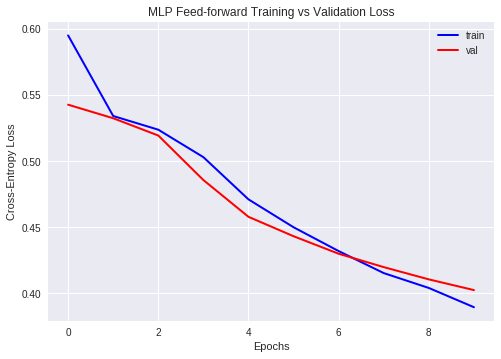

In [54]:
#Loss plots
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('MLP Feed-forward Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

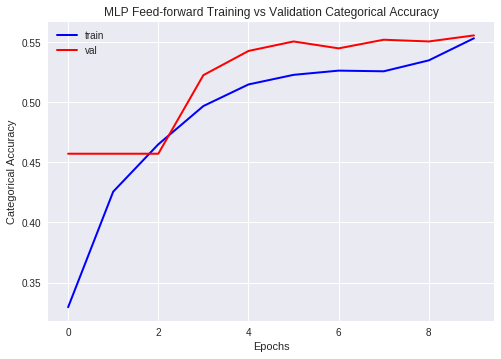

In [55]:
#Categorical Accuracy plot:
plt.figure()
plt.plot(history.history['categorical_accuracy'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_categorical_accuracy'], lw=2.0, color='r', label='val')
plt.title('MLP Feed-forward Training vs Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.legend(loc='upper left')
plt.show()

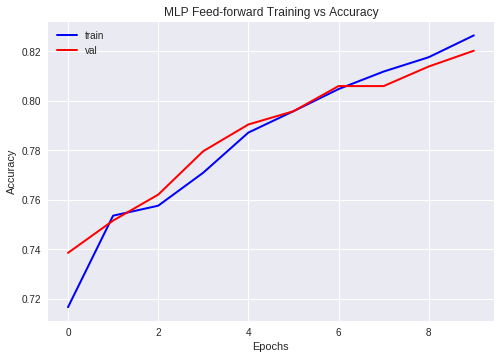

In [56]:
#Accuracy plot:
plt.figure()
plt.plot(history.history['acc'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_acc'], lw=2.0, color='r', label='val')
plt.title('MLP Feed-forward Training vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [57]:
#Predicting:
y_pred = model.predict(x_test, batch_size=256, verbose=1)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.apply(lambda x: [0 if y <= 0.5 else 1 for y in x])
y_pred.head()

3478/3478 [==============================] - 0s 94us/step


,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,1,1,1,0,0,0


In [58]:
from sklearn.metrics import classification_report,accuracy_score
print("classification_report",classification_report(y_test,y_pred))
print("accuracy_score",accuracy_score(y_test,y_pred))
from sklearn.metrics import hamming_loss
print("hamming_loss",hamming_loss(y_test,y_pred))


classification_report               precision    recall  f1-score   support

           0       0.70      0.75      0.72      1606
           1       0.68      0.54      0.60      1070
           2       0.57      0.33      0.42       770
           3       0.71      0.44      0.54       758
           4       0.81      0.69      0.74       689
           5       0.93      0.23      0.36       599
           6       0.92      0.11      0.20       430

   micro avg       0.71      0.51      0.59      5922
   macro avg       0.76      0.44      0.51      5922
weighted avg       0.73      0.51      0.57      5922
 samples avg       0.64      0.55      0.56      5922

accuracy_score 0.324036802760207
hamming_loss 0.17025384046660644


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
